# Download fashion mnist

In [21]:
import torchvision.transforms as transforms
import torchvision.datasets as dset

data = '../data/mnist'
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_set = dset.MNIST(root=data, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=data, train=False, transform=trans)

Processing...
Done!


In [ ]:
## Fashion mnist - download later

In [ ]:
import collections

folder = '../data/fashion_mnist/'

file_dict = collections.OrderedDict()
file_dict['FILENAME'] = 'train-images-idx3-ubyte.gz'
file_dict['FILENAME'] = 'train-labels-idx1-ubyte.gz'
file_dict['FILENAME'] = 't10k-images-idx3-ubyte.gz'
file_dict['FILENAME'] = 't10k-labels-idx1-ubyte.gz'

for file,url in file_dict.items():
    url_q = "'" + url + "'"
    ! wget --continue --no-check-certificate --no-proxy -O $file $url_q

In [ ]:
dset.FashionMNIST(root, train=True, transform=None, target_transform=None, download=False)

In [ ]:
# make sure you downloaded the files correctly
import hashlib
import os.path as path

def sha256(fname):
    hash_sha256 = hashlib.sha256()
    with open(fname, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b''):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

filenames = ['', '', '', '', ']

hashes = ['', '', '', '', '']

data_root = path.join('data/')  # make sure you set up this path correctly

# this may take a few minutes
for filename, hash_ in zip(filenames, hashes):
    computed_hash = sha256(path.join(data_root, filename))
    if computed_hash == hash_:
        print('{}: OK'.format(filename))
    else:
        print('{}: fail'.format(filename))
        print('expected: {}'.format(hash_))
        print('computed: {}'.format(computed_hash))

# Investigate fruit dataset

In [1]:
data = '../data/fruits/'
!ls -lsR $data | wc -l

40165


In [2]:
!ls '../data/fruits/'

Test  Training	Validation


In [20]:
import glob

files = []
parent_list = ['Test','Training','Validation']

for parent in parent_list:
    print (parent)
    for filename in glob.iglob('../data/fruits/{}/**/*.jpg'.format(parent), recursive=True):
        files.append(filename)

    folder_list = [file.split('/')[4] for file in files]
    folder_set = set(folder_list)
    
    for folder in folder_set:
        print('{} - {}'.format(folder,folder_list.count(folder)))        
          

Test
mandarin - 202
watermelon - 157
apricot - 175
lime - 99
avocado - 153
melon - 194
pomegranate - 186
kiwi - 180
pineapple - 191
plum - 205
raspberry - 213
papaya - 189
peach - 198
grape - 205
banana - 178
blackberry - 169
strawberry - 214
lemon - 173
orange - 146
apple - 208
grapefruit - 148
none - 1570
coconut - 135
cherry - 214
mango - 180
Training
mandarin - 1149
watermelon - 979
apricot - 941
lime - 617
avocado - 967
melon - 988
pomegranate - 1130
kiwi - 1110
pineapple - 1065
plum - 1056
raspberry - 1197
papaya - 1047
peach - 1032
grape - 1148
banana - 1019
blackberry - 935
strawberry - 1233
lemon - 1026
orange - 897
apple - 1206
grapefruit - 750
none - 8753
coconut - 663
cherry - 1204
mango - 1076
Validation
mandarin - 1336
watermelon - 1165
apricot - 1117
lime - 719
avocado - 1139
melon - 1161
pomegranate - 1375
kiwi - 1288
pineapple - 1246
plum - 1234
raspberry - 1428
papaya - 1206
peach - 1214
grape - 1376
banana - 1199
blackberry - 1115
strawberry - 1460
lemon - 1196
orang

In [11]:
)

mandarin has 202 items
watermelon has 157 items
apricot has 175 items
lime has 99 items
avocado has 153 items
melon has 194 items
pomegranate has 186 items
kiwi has 180 items
pineapple has 191 items
plum has 205 items
raspberry has 213 items
papaya has 189 items
peach has 198 items
grape has 205 items
banana has 178 items
blackberry has 169 items
strawberry has 214 items
lemon has 173 items
orange has 146 items
apple has 208 items
grapefruit has 148 items
none has 1570 items
coconut has 135 items
cherry has 214 items
mango has 180 items


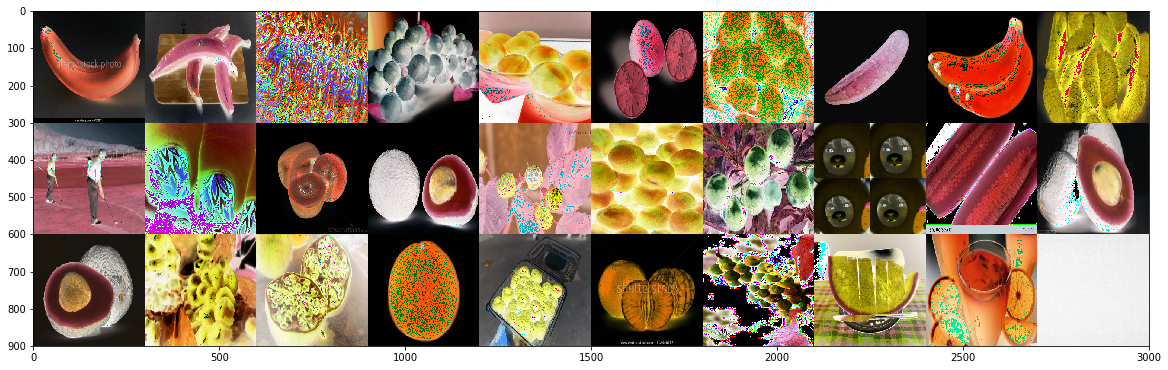

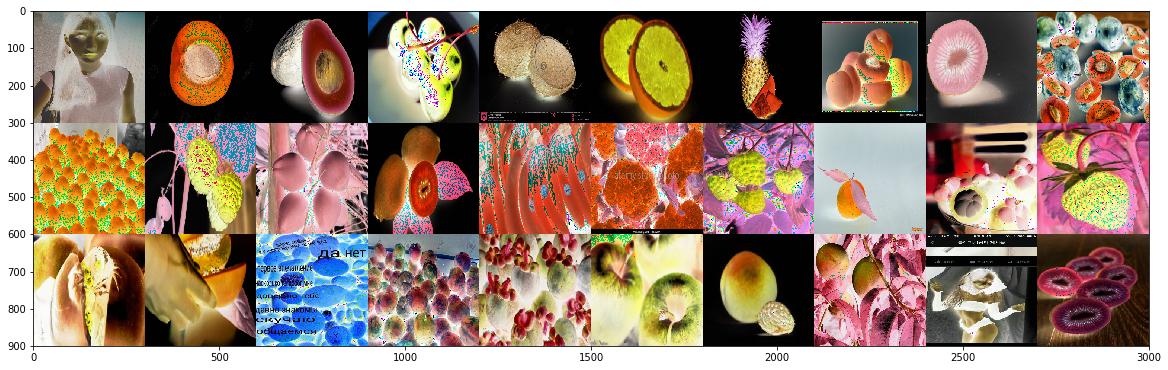

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


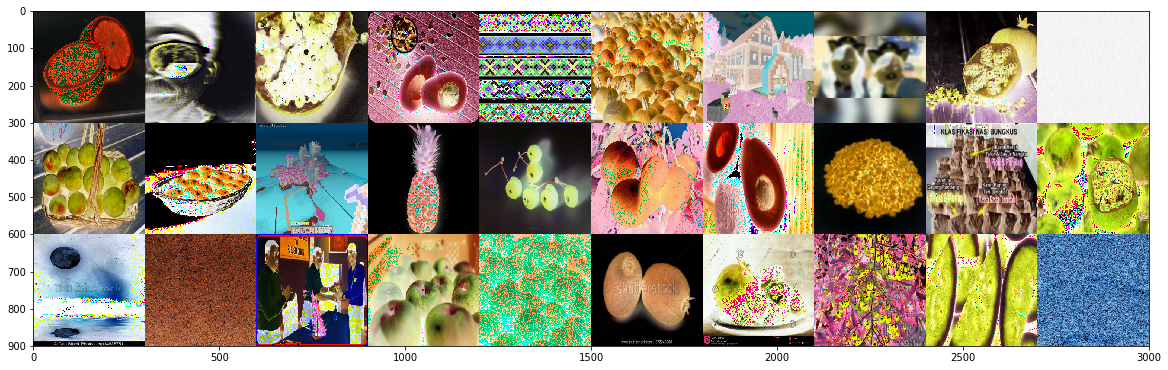

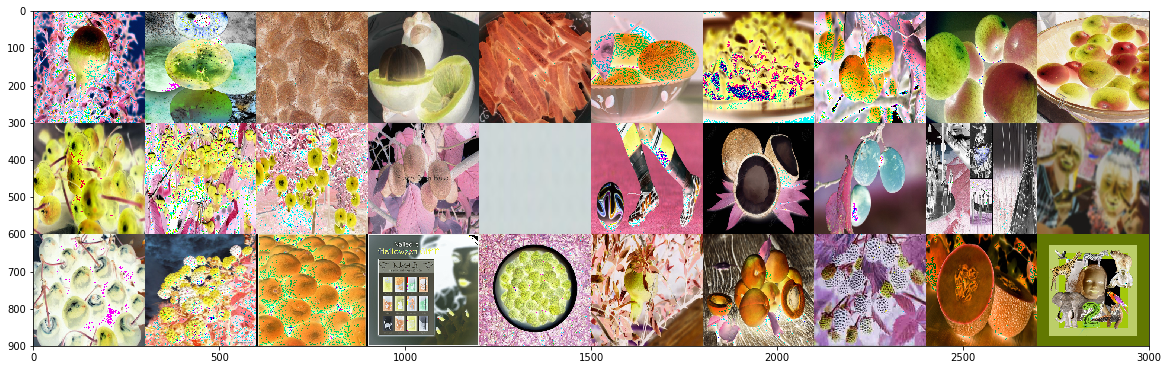

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


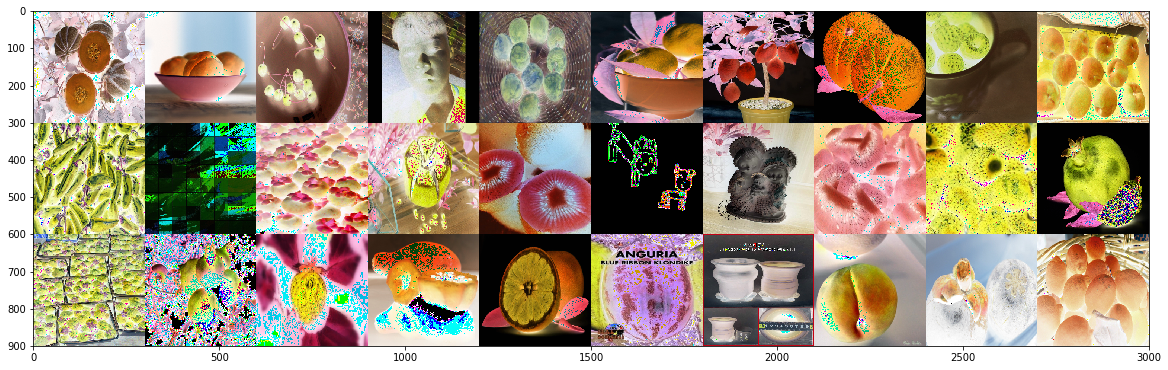

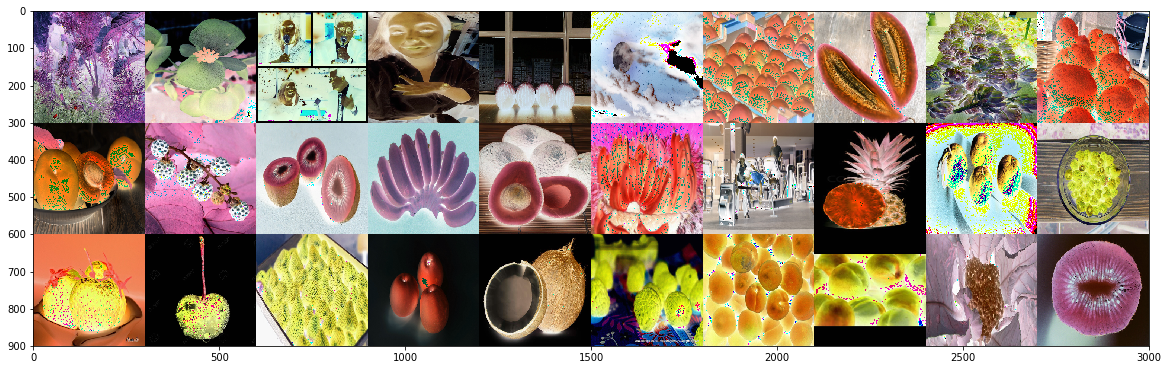

In [6]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2

sample_size = 3 * 10
files = [(filename) for filename in glob.iglob(data+'**/*.jpg', recursive=True)]


def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result


def make_array():
    array = np.zeros((sample_size, 300, 300, 3))
    i = 0
    for img_path in sample:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (300, 300))        
        
        array[i] = img
        i += 1

    return array

for i in range(0,10):
    sample = random.sample(files,sample_size)
    array = make_array()
    result = gallery(array,ncols=10)
    plt.figure(figsize=(20,10))
    plt.imshow(result)
    plt.show()

In [7]:
!ls $data

Test  Training	Validation


# Train VGG-16 on fruits

In [5]:
import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

In [2]:
model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__")
    and callable(models.__dict__[name]))

In [3]:
model_names

['alexnet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'inception_v3',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn']

In [4]:
arch = 'vgg16'
model = models.__dict__[arch](pretrained=True)

In [5]:
model

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU (inplace)
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU (inplace)
    (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [2]:
data = '../data/fruits/'
!ls -lsR $data | wc -l

40165


In [10]:
model

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU (inplace)
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU (inplace)
    (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [4]:
# Data loading code
data = '../data/fruits/'

batch_size = 16
workers = 1
distributed = False
lr = 0.001
momentum = 0.9
weight_decay = 1e-4
# unclear how to set dist_url - leave for now, no need
validate = False
start_epoch = 1
epochs = 10
start_epoch = 1

'''
parser.add_argument('--world-size', default=1, type=int,
                    help='number of distributed processes')
parser.add_argument('--dist-url', default='tcp://224.66.41.62:23456', type=str,
                    help='url used to set up distributed training')
parser.add_argument('--dist-backend', default='gloo', type=str,
                    help='distributed backend')
'''

traindir = os.path.join(data, 'Training')
valdir = os.path.join(data, 'Validation')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ]))

if distributed:
    dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,
                            world_size=args.world_size)

if distributed:
    train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
else:
    train_sampler = None

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=(train_sampler is None),
    num_workers=workers,
    pin_memory=True,
    sampler=train_sampler)

val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valdir, transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size,
    shuffle=False,
    num_workers=workers,
    pin_memory=True)

# define loss function (criterion) and optimizer
criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr,
                            momentum=momentum,
                            weight_decay=weight_decay)

resume = False
# start_epoch = 


# optionally resume from a checkpoint
if resume:
    if os.path.isfile(resume):
        print("=> loading checkpoint '{}'".format(resume))
        checkpoint = torch.load(resume)
        start_epoch = checkpoint['epoch']
        best_prec1 = checkpoint['best_prec1']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        print("=> loaded checkpoint '{}' (epoch {})"
              .format(resume, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(resume))

# https://discuss.pytorch.org/t/what-does-torch-backends-cudnn-benchmark-do/5936/2
cudnn.benchmark = True

# if evaluate:
    # validate(val_loader, model, criterion)
    # return

In [41]:
for i, (input, target) in enumerate(train_loader):
    print (i,input.size(), target.size())
    print (target)
    break

0 torch.Size([16, 3, 224, 224]) torch.Size([16])

 15
 23
  3
 15
 15
  1
 12
  7
 11
 21
 24
  6
  0
 15
 19
 15
[torch.LongTensor of size 16]



In [5]:
print_freq = 10

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res        

def train(train_loader,
          model,
          criterion,
          optimizer,
          epoch):
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        target = target.cuda(async=True)
        input_var = torch.autograd.Variable(input)
        target_var = torch.autograd.Variable(target)

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)
        
        # measure gradients somewhere here, by layer
        
        # measure accuracy and record loss
        prec1, prec5 = accuracy(output.data, target, topk=(1, 5))
        losses.update(loss.data[0], input.size(0))
        top1.update(prec1[0], input.size(0))
        top5.update(prec5[0], input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})\t'
                  'Prec@5 {top5.val:.3f} ({top5.avg:.3f})'.format(
                   epoch, i, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses, top1=top1, top5=top5))

def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    global lr
    lr = lr * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr            

In [28]:
for param_group in optimizer.param_groups:
    print(param_group['lr']) 

0.001


In [32]:
model.features

Sequential (
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU (inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU (inplace)
  (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU (inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU (inplace)
  (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU (inplace)
  (19): Conv2d(512,

In [6]:
# train the model

for epoch in range(start_epoch, epochs):
    if distributed:
        train_sampler.set_epoch(epoch)
    
    adjust_learning_rate(optimizer, epoch)

    # train for one epoch
    train(train_loader, model, criterion, optimizer, epoch)

    # evaluate on validation set
    prec1 = validate(val_loader, model, criterion)

    # remember best prec@1 and save checkpoint
    is_best = prec1 > best_prec1
    best_prec1 = max(prec1, best_prec1)
    save_checkpoint({
        'epoch': epoch + 1,
        'arch': args.arch,
        'state_dict': model.state_dict(),
        'best_prec1': best_prec1,
        'optimizer' : optimizer.state_dict(),
    }, is_best)

/opt/conda/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


TypeError: FloatClassNLLCriterion_updateOutput received an invalid combination of arguments - got ([32;1mint[0m, [32;1mtorch.FloatTensor[0m, [31;1mtorch.cuda.LongTensor[0m, [32;1mtorch.FloatTensor[0m, [32;1mbool[0m, [32;1mNoneType[0m, [32;1mtorch.FloatTensor[0m, [32;1mint[0m), but expected (int state, torch.FloatTensor input, torch.LongTensor target, torch.FloatTensor output, bool sizeAverage, [torch.FloatTensor weights or None], torch.FloatTensor total_weight, int ignore_index)

## Original tutorial
https://github.com/pytorch/examples/blob/master/imagenet/main.py

In [ ]:
import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__")
    and callable(models.__dict__[name]))

parser = argparse.ArgumentParser(description='PyTorch ImageNet Training')
parser.add_argument('data', metavar='DIR',
                    help='path to dataset')
parser.add_argument('--arch', '-a', metavar='ARCH', default='resnet18',
                    choices=model_names,
                    help='model architecture: ' +
                        ' | '.join(model_names) +
                        ' (default: resnet18)')
parser.add_argument('-j', '--workers', default=4, type=int, metavar='N',
                    help='number of data loading workers (default: 4)')
parser.add_argument('--epochs', default=90, type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('--start-epoch', default=0, type=int, metavar='N',
                    help='manual epoch number (useful on restarts)')
parser.add_argument('-b', '--batch-size', default=256, type=int,
                    metavar='N', help='mini-batch size (default: 256)')
parser.add_argument('--lr', '--learning-rate', default=0.1, type=float,
                    metavar='LR', help='initial learning rate')
parser.add_argument('--momentum', default=0.9, type=float, metavar='M',
                    help='momentum')
parser.add_argument('--weight-decay', '--wd', default=1e-4, type=float,
                    metavar='W', help='weight decay (default: 1e-4)')
parser.add_argument('--print-freq', '-p', default=10, type=int,
                    metavar='N', help='print frequency (default: 10)')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')
parser.add_argument('-e', '--evaluate', dest='evaluate', action='store_true',
                    help='evaluate model on validation set')
parser.add_argument('--pretrained', dest='pretrained', action='store_true',
                    help='use pre-trained model')
parser.add_argument('--world-size', default=1, type=int,
                    help='number of distributed processes')
parser.add_argument('--dist-url', default='tcp://224.66.41.62:23456', type=str,
                    help='url used to set up distributed training')
parser.add_argument('--dist-backend', default='gloo', type=str,
                    help='distributed backend')

best_prec1 = 0


def main():
    global args, best_prec1
    args = parser.parse_args()

    args.distributed = args.world_size > 1

    if args.distributed:
        dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,
                                world_size=args.world_size)

    # create model
    if args.pretrained:
        print("=> using pre-trained model '{}'".format(args.arch))
        model = models.__dict__[args.arch](pretrained=True)
    else:
        print("=> creating model '{}'".format(args.arch))
        model = models.__dict__[args.arch]()

    if not args.distributed:
        if args.arch.startswith('alexnet') or args.arch.startswith('vgg'):
            model.features = torch.nn.DataParallel(model.features)
            model.cuda()
        else:
            model = torch.nn.DataParallel(model).cuda()
    else:
        model.cuda()
        model = torch.nn.parallel.DistributedDataParallel(model)

    # define loss function (criterion) and optimizer
    criterion = nn.CrossEntropyLoss().cuda()

    optimizer = torch.optim.SGD(model.parameters(), args.lr,
                                momentum=args.momentum,
                                weight_decay=args.weight_decay)

    # optionally resume from a checkpoint
    if args.resume:
        if os.path.isfile(args.resume):
            print("=> loading checkpoint '{}'".format(args.resume))
            checkpoint = torch.load(args.resume)
            args.start_epoch = checkpoint['epoch']
            best_prec1 = checkpoint['best_prec1']
            model.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(args.resume, checkpoint['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

    cudnn.benchmark = True

    # Data loading code
    traindir = os.path.join(args.data, 'train')
    valdir = os.path.join(args.data, 'val')
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    train_dataset = datasets.ImageFolder(
        traindir,
        transforms.Compose([
            transforms.RandomSizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ]))

    if args.distributed:
        train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
    else:
        train_sampler = None

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=args.batch_size, shuffle=(train_sampler is None),
        num_workers=args.workers, pin_memory=True, sampler=train_sampler)

    val_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(valdir, transforms.Compose([
            transforms.Scale(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=args.batch_size, shuffle=False,
        num_workers=args.workers, pin_memory=True)

    if args.evaluate:
        validate(val_loader, model, criterion)
        return

    for epoch in range(args.start_epoch, args.epochs):
        if args.distributed:
            train_sampler.set_epoch(epoch)
        adjust_learning_rate(optimizer, epoch)

        # train for one epoch
        train(train_loader, model, criterion, optimizer, epoch)

        # evaluate on validation set
        prec1 = validate(val_loader, model, criterion)

        # remember best prec@1 and save checkpoint
        is_best = prec1 > best_prec1
        best_prec1 = max(prec1, best_prec1)
        save_checkpoint({
            'epoch': epoch + 1,
            'arch': args.arch,
            'state_dict': model.state_dict(),
            'best_prec1': best_prec1,
            'optimizer' : optimizer.state_dict(),
        }, is_best)


def train(train_loader, model, criterion, optimizer, epoch):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        target = target.cuda(async=True)
        input_var = torch.autograd.Variable(input)
        target_var = torch.autograd.Variable(target)

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)

        # measure accuracy and record loss
        prec1, prec5 = accuracy(output.data, target, topk=(1, 5))
        losses.update(loss.data[0], input.size(0))
        top1.update(prec1[0], input.size(0))
        top5.update(prec5[0], input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})\t'
                  'Prec@5 {top5.val:.3f} ({top5.avg:.3f})'.format(
                   epoch, i, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses, top1=top1, top5=top5))


def validate(val_loader, model, criterion):
    batch_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()

    # switch to evaluate mode
    model.eval()

    end = time.time()
    for i, (input, target) in enumerate(val_loader):
        target = target.cuda(async=True)
        input_var = torch.autograd.Variable(input, volatile=True)
        target_var = torch.autograd.Variable(target, volatile=True)

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)

        # measure accuracy and record loss
        prec1, prec5 = accuracy(output.data, target, topk=(1, 5))
        losses.update(loss.data[0], input.size(0))
        top1.update(prec1[0], input.size(0))
        top5.update(prec5[0], input.size(0))

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            print('Test: [{0}/{1}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})\t'
                  'Prec@5 {top5.val:.3f} ({top5.avg:.3f})'.format(
                   i, len(val_loader), batch_time=batch_time, loss=losses,
                   top1=top1, top5=top5))

    print(' * Prec@1 {top1.avg:.3f} Prec@5 {top5.avg:.3f}'
          .format(top1=top1, top5=top5))

    return top1.avg


def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    lr = args.lr * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


if __name__ == '__main__':
    main()load_state_dict

# Model finetuning tutorial 
https://gist.github.com/panovr/2977d9f26866b05583b0c40d88a315bf

In [ ]:
import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models


model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__"))

# parser parqams
parser = argparse.ArgumentParser(description='PyTorch ImageNet Training')
parser.add_argument('data', metavar='DIR',
                    help='path to dataset')
parser.add_argument('--arch', '-a', metavar='ARCH', default='resnet18',
                    choices=model_names,
                    help='model architecture: ' +
                        ' | '.join(model_names) +
                        ' (default: resnet18)')
parser.add_argument('-j', '--workers', default=4, type=int, metavar='N',
                    help='number of data loading workers (default: 4)')
parser.add_argument('--epochs', default=90, type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('--start-epoch', default=0, type=int, metavar='N',
                    help='manual epoch number (useful on restarts)')
parser.add_argument('-b', '--batch-size', default=256, type=int,
                    metavar='N', help='mini-batch size (default: 256)')
parser.add_argument('--lr', '--learning-rate', default=0.1, type=float,
                    metavar='LR', help='initial learning rate')
parser.add_argument('--momentum', default=0.9, type=float, metavar='M',
                    help='momentum')
parser.add_argument('--weight-decay', '--wd', default=1e-4, type=float,
                    metavar='W', help='weight decay (default: 1e-4)')
parser.add_argument('--print-freq', '-p', default=10, type=int,
                    metavar='N', help='print frequency (default: 10)')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')
parser.add_argument('-e', '--evaluate', dest='evaluate', action='store_true',
                    help='evaluate model on validation set')
parser.add_argument('--pretrained', dest='pretrained', action='store_true',
                    help='use pre-trained model')
parser.add_argument('--finetune', dest='finetune', action='store_true',
                    help='fine tune pre-trained model')

best_prec1 = 0

class FineTuneModel(nn.Module):
    def __init__(self, original_model, arch, num_classes):
        super(FineTuneModel, self).__init__()

        if arch.startswith('alexnet') :
            self.features = original_model.features
            self.classifier = nn.Sequential(
                nn.Dropout(),
                nn.Linear(256 * 6 * 6, 4096),
                nn.ReLU(inplace=True),
                nn.Dropout(),
                nn.Linear(4096, 4096),
                nn.ReLU(inplace=True),
                nn.Linear(4096, num_classes),
            )
            self.modelName = 'alexnet'
        elif arch.startswith('resnet') :
            # Everything except the last linear layer
            self.features = nn.Sequential(*list(original_model.children())[:-1])
            self.classifier = nn.Sequential(
                nn.Linear(512, num_classes)
            )
            self.modelName = 'resnet'
        elif arch.startswith('vgg16'):
            self.features = original_model.features
            self.classifier = nn.Sequential(
                nn.Dropout(),
                nn.Linear(25088, 4096),
                nn.ReLU(inplace=True),
                nn.Dropout(),
                nn.Linear(4096, 4096),
                nn.ReLU(inplace=True),
                nn.Linear(4096, num_classes),
            )
            self.modelName = 'vgg16'
        else :
            raise("Finetuning not supported on this architecture yet")

        # Freeze those weights
        for p in self.features.parameters():
            p.requires_grad = False


    def forward(self, x):
        f = self.features(x)
        if self.modelName == 'alexnet' :
            f = f.view(f.size(0), 256 * 6 * 6)
        elif self.modelName == 'vgg16':
            f = f.view(f.size(0), -1)
        elif self.modelName == 'resnet' :
            f = f.view(f.size(0), -1)
        y = self.classifier(f)
        return y


def main():
    global args, best_prec1
    args = parser.parse_args()

    traindir = os.path.join(args.data, 'train')
    valdir = os.path.join(args.data, 'val')
    # Get number of classes from train directory
    num_classes = len([name for name in os.listdir(traindir)])
    print("num_classes = '{}'".format(num_classes))
    # create model
    if args.finetune:
        print("=> using pre-trained model '{}'".format(args.arch))
        original_model = models.__dict__[args.arch](pretrained=True)
        model = FineTuneModel(original_model, args.arch, num_classes)
    else:
        print("=> creating model '{}'".format(args.arch))
        model = models.__dict__[args.arch]()

    if args.arch.startswith('alexnet') or args.arch.startswith('vgg'):
        model.features = torch.nn.DataParallel(model.features)
        model.cuda()
    else:
        model = torch.nn.DataParallel(model).cuda()

    # optionally resume from a checkpoint
    if args.resume:
        if os.path.isfile(args.resume):
            print("=> loading checkpoint '{}'".format(args.resume))
            checkpoint = torch.load(args.resume)
            args.start_epoch = checkpoint['epoch']
            best_prec1 = checkpoint['best_prec1']
            model.load_state_dict(checkpoint['state_dict'])
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(args.evaluate, checkpoint['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

    cudnn.benchmark = True

    # Data loading code
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    train_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(traindir, transforms.Compose([
            transforms.RandomSizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])),    
        batch_size=args.batch_size, shuffle=True,
        num_workers=args.workers, pin_memory=True)

    val_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(valdir, transforms.Compose([
            transforms.Scale(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ])),
        batch_size=args.batch_size, shuffle=False,
        num_workers=args.workers, pin_memory=True)

    # define loss function (criterion) and pptimizer
    criterion = nn.CrossEntropyLoss().cuda()

    optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                args.lr,
                                momentum=args.momentum,
                                weight_decay=args.weight_decay)

    if args.evaluate:
        validate(val_loader, model, criterion)
        return

    for epoch in range(args.start_epoch, args.epochs):
        adjust_learning_rate(optimizer, epoch)

        # train for one epoch
        train(train_loader, model, criterion, optimizer, epoch)

        # evaluate on validation set
        prec1 = validate(val_loader, model, criterion)

        # remember best prec@1 and save checkpoint
        is_best = prec1 > best_prec1
        best_prec1 = max(prec1, best_prec1)
        save_checkpoint({
            'epoch': epoch + 1,
            'arch': args.arch,
            'state_dict': model.state_dict(),
            'best_prec1': best_prec1,
        }, is_best)


def train(train_loader, model, criterion, optimizer, epoch):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        target = target.cuda(async=True)
        input_var = torch.autograd.Variable(input)
        target_var = torch.autograd.Variable(target)

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)

        # measure accuracy and record loss
        prec1, prec5 = accuracy(output.data, target, topk=(1, 5))
        losses.update(loss.data[0], input.size(0))
        top1.update(prec1[0], input.size(0))
        top5.update(prec5[0], input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})\t'
                  'Prec@5 {top5.val:.3f} ({top5.avg:.3f})'.format(
                   epoch, i, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses, top1=top1, top5=top5))


def validate(val_loader, model, criterion):
    batch_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()
    top5 = AverageMeter()

    # switch to evaluate mode
    model.eval()

    end = time.time()
    for i, (input, target) in enumerate(val_loader):
        target = target.cuda(async=True)
        input_var = torch.autograd.Variable(input, volatile=True)
        target_var = torch.autograd.Variable(target, volatile=True)

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)

        # measure accuracy and record loss
        prec1, prec5 = accuracy(output.data, target, topk=(1, 5))
        losses.update(loss.data[0], input.size(0))
        top1.update(prec1[0], input.size(0))
        top5.update(prec5[0], input.size(0))

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            print('Test: [{0}/{1}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})\t'
                  'Prec@5 {top5.val:.3f} ({top5.avg:.3f})'.format(
                   i, len(val_loader), batch_time=batch_time, loss=losses,
                   top1=top1, top5=top5))

    print(' * Prec@1 {top1.avg:.3f} Prec@5 {top5.avg:.3f}'
          .format(top1=top1, top5=top5))

    return top1.avg


def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    lr = args.lr * (0.1 ** (epoch // 30))
    for param_group in optimizer.state_dict()['param_groups']:
        param_group['lr'] = lr


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


if __name__ == '__main__':
    main()

# FT tutorial
http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

plt.ion()   # interactive mode

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '../data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

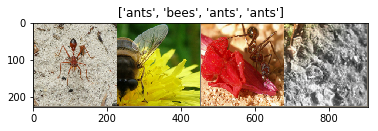

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [7]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [8]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                return

In [4]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features


In [5]:
model_ft.fc = nn.Linear(num_ftrs, 2)

if use_gpu:
    model_ft = model_ft.cuda()

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [11]:
model = model_ft
epoch = 0
num_epochs = 0
scheduler = exp_lr_scheduler
optimizer = optimizer_ft

since = time.time()

best_model_wts = model.state_dict()
best_acc = 0.0

print('Epoch {}/{}'.format(epoch, num_epochs - 1))
print('-' * 10)

phase = 'train'

if phase == 'train':
    scheduler.step()
    model.train(True)  # Set model to training mode
else:
    model.train(False)  # Set model to evaluate mode

running_loss = 0.0
running_corrects = 0

# Iterate over data.
for data in dataloders[phase]:
    # get the inputs
    inputs, labels = data

    # wrap them in Variable
    if use_gpu:
        inputs = Variable(inputs.cuda())
        labels = Variable(labels.cuda())
    else:
        inputs, labels = Variable(inputs), Variable(labels)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward
    outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    loss = criterion(outputs, labels)

    # backward + optimize only if in training phase
    if phase == 'train':
        loss.backward()
        optimizer.step()

    # statistics
    running_loss += loss.data[0]
    running_corrects += torch.sum(preds == labels.data)
    
    break
    
epoch_loss = running_loss / dataset_sizes[phase]
epoch_acc = running_corrects / dataset_sizes[phase]

print('{} Loss: {:.4f} Acc: {:.4f}'.format(
    phase, epoch_loss, epoch_acc))

# deep copy the model
if phase == 'val' and epoch_acc > best_acc:
    best_acc = epoch_acc
    best_model_wts = model.state_dict()

print()



Epoch 0/-1
----------
train Loss: 0.0026 Acc: 0.0123



## Play with gradients

In [80]:
model

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [73]:
for layer in list(model.children()):

    for sub_layer in list(layer.children()):    
        print(sub_layer)
        print (isinstance(sub_layer,nn.Conv2d))


BasicBlock (
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
)
False
BasicBlock (
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
)
False
BasicBlock (
  (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNor

In [70]:
model.children()

<generator object Module.children at 0x7f6adee03728>

In [48]:
for child in model.children():
    print('\n')
    print (child)



Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)


ReLU (inplace)


MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))


Sequential (
  (0): BasicBlock (
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU (inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (1): BasicBlock (
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU (inplace)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
)


Sequential (
  (0): BasicBloc

In [119]:
layer_list = ['layer1','layer2','layer3','layer4']
for layer in layer_list:
    for block in getattr(model, layer):
        for layer in block.children():
            if isinstance(layer,nn.Conv2d ):
                print ( layer.parameters().grad.size() )

AttributeError: 'generator' object has no attribute 'grad'

In [129]:
for param in layer.parameters():
    print (1)
    print (param.grad.size())

1
torch.Size([64, 64, 3, 3])


In [156]:
model

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

layer1.0.conv1.weight   torch.Size([64, 64, 3, 3])


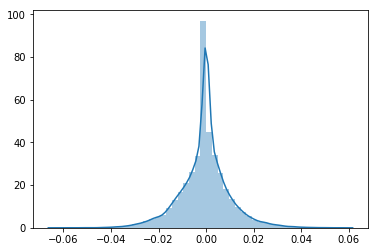

layer3.1.conv1.weight   torch.Size([256, 256, 3, 3])


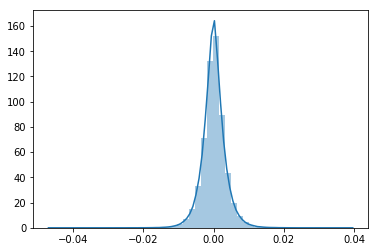

layer3.0.conv1.weight   torch.Size([256, 128, 3, 3])


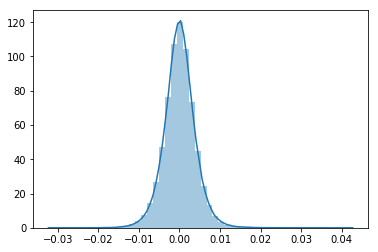

layer2.1.conv1.weight   torch.Size([128, 128, 3, 3])


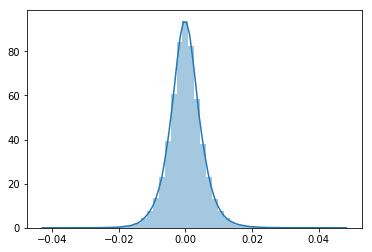

layer4.0.conv1.weight   torch.Size([512, 256, 3, 3])


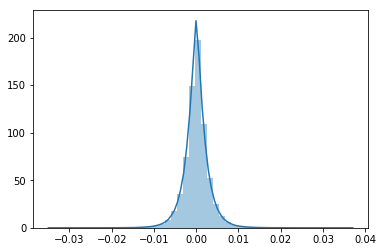

conv1.weight   torch.Size([64, 3, 7, 7])


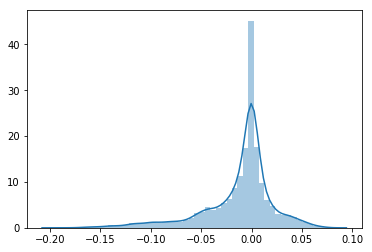

layer3.0.conv2.weight   torch.Size([256, 256, 3, 3])


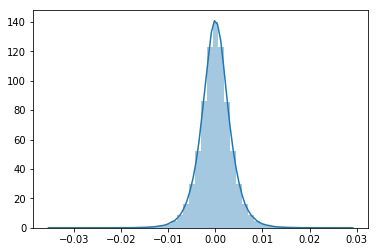

layer2.1.conv2.weight   torch.Size([128, 128, 3, 3])


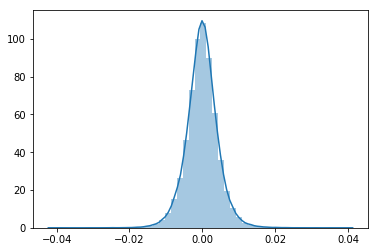

layer1.0.conv2.weight   torch.Size([64, 64, 3, 3])


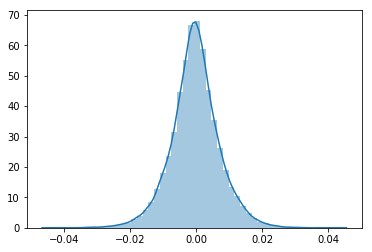

layer4.1.conv1.weight   torch.Size([512, 512, 3, 3])


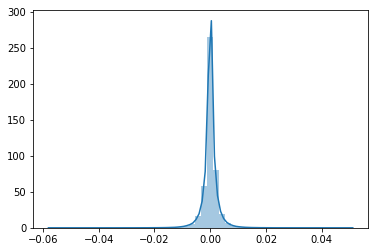

layer4.0.conv2.weight   torch.Size([512, 512, 3, 3])


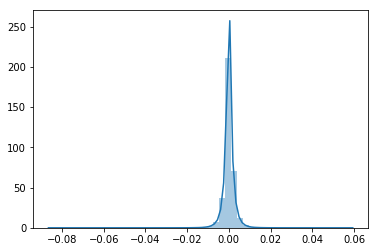

layer1.1.conv2.weight   torch.Size([64, 64, 3, 3])


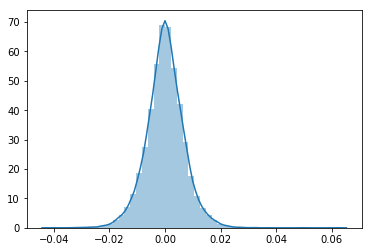

layer1.1.conv1.weight   torch.Size([64, 64, 3, 3])


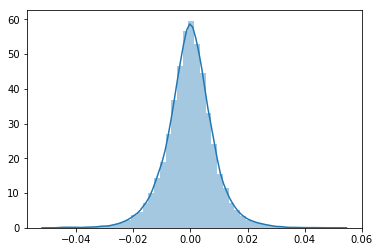

layer2.0.conv1.weight   torch.Size([128, 64, 3, 3])


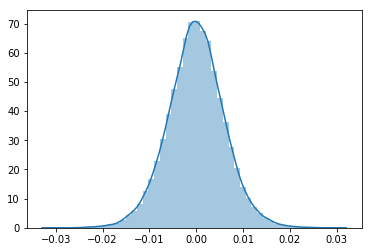

layer2.0.conv2.weight   torch.Size([128, 128, 3, 3])


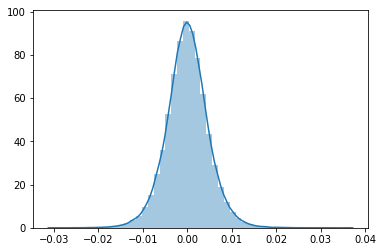

layer4.1.conv2.weight   torch.Size([512, 512, 3, 3])


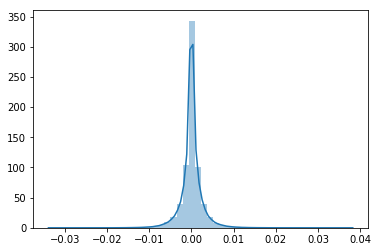

layer3.1.conv2.weight   torch.Size([256, 256, 3, 3])


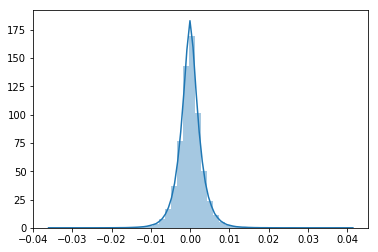

In [177]:
import seaborn as sn

grad_of_params = {}
for name, parameter in model.named_parameters():
    grad_of_params[name] = parameter.grad
    
conv_layer_names = [x for x in list(grad_of_params.keys()) if ('conv2' in x) or ('conv1' in x)]
grad_dict = {your_key: grad_of_params[your_key] for your_key in conv_layer_names }

for key, value in grad_dict.items():
    print (key, ' ', value.size())
    

    sns.distplot(value.view(-1).cpu().data.numpy())
    plt.show()

    

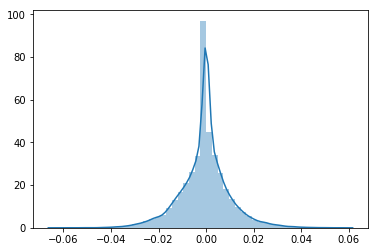

In [174]:
s






In [159]:
value.size()

torch.Size([64, 64, 3, 3])

layer1.0.conv1.weight   torch.Size([64, 64, 3, 3])


In [145]:
conv_layer_names[0]

'layer3.1.conv1.weight'

In [110]:
{ (some_key if condition else default_key):(something_if_true if condition else something_if_false) for key, value in grad_of_params.items() }


torch.Size([64])

In [18]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.1781 Acc: 0.6230
val Loss: 0.0784 Acc: 0.8627

Epoch 1/24
----------
train Loss: 0.1452 Acc: 0.7500
val Loss: 0.0458 Acc: 0.9281

Epoch 2/24
----------
train Loss: 0.1380 Acc: 0.7746
val Loss: 0.1026 Acc: 0.8693

Epoch 3/24
----------
train Loss: 0.1736 Acc: 0.7869
val Loss: 0.1482 Acc: 0.8039

Epoch 4/24
----------
train Loss: 0.1141 Acc: 0.8156
val Loss: 0.1079 Acc: 0.8693

Epoch 5/24
----------
train Loss: 0.1650 Acc: 0.7459
val Loss: 0.1403 Acc: 0.7778

Epoch 6/24
----------
train Loss: 0.0925 Acc: 0.8648
val Loss: 0.1108 Acc: 0.8105

Epoch 7/24
----------
train Loss: 0.0682 Acc: 0.9016
val Loss: 0.0777 Acc: 0.8758

Epoch 8/24
----------
train Loss: 0.0746 Acc: 0.8648
val Loss: 0.0709 Acc: 0.8954

Epoch 9/24
----------
train Loss: 0.0624 Acc: 0.8934
val Loss: 0.0988 Acc: 0.8824

Epoch 10/24
----------
train Loss: 0.0670 Acc: 0.8852
val Loss: 0.0654 Acc: 0.9020

Epoch 11/24
----------
train Loss: 0.0935 Acc: 0.8402
val Loss: 0.0598 Acc: 0.9150

Ep

# Visualize gradients

In [90]:
import torch
import torchvision.models as models
from matplotlib import pyplot as plt

vgg = models.vgg16(pretrained=True)
mm = vgg.double()

filters = mm.modules
body_model = [i for i in mm.children()][0]
layer1 = body_model[0]
tensor = layer1.weight.data.numpy()
plot_kernels(tensor)

ValueError: Floating point image RGB values must be in the 0..1 range.

In [92]:
tensor.shape

(64, 3, 3, 3)

In [34]:
body_model = [i for i in mm.children()][0]
layer1 = body_model[0]
tensor = layer1.weight.data.numpy()

In [84]:
tensor[61]

array([[[ 0.07759854,  0.12691836,  0.0323052 ],
        [ 0.22131467,  0.2468054 , -0.04663664],
        [ 0.04640706,  0.02824569,  0.0175284 ]],

       [[-0.1832727 , -0.067425  , -0.00721196],
        [-0.04885479,  0.00704267, -0.1288318 ],
        [-0.06460051, -0.06456574,  0.04423514]],

       [[-0.22547162, -0.11931261, -0.02342515],
        [-0.0991712 , -0.01514298,  0.00095385],
        [-0.0261374 ,  0.00135672,  0.14281954]]])

In [56]:
for arr in tensor:
    print (max(np.amax(arr,axis=(0,1,2)), -np.amin(arr,axis=(0,1,2)))
)

0.765662252903
0.841266751289
1.06969118118
0.272122859955
1.07338786125
0.290458619595
0.900283694267
0.266550987959
0.416004240513
0.511457979679
0.355508744717
0.633840441704
0.477723509073
0.237595304847
0.695042252541
0.231333553791
0.354016602039
0.37953877449
0.562103450298
0.93495452404
0.693455457687
0.737949192524
0.283332794905
0.46568441391
0.403708517551
0.278277128935
0.281219094992
0.384609341621
0.432996183634
0.435956150293
0.259461283684
0.301754564047
0.653345108032
0.847253203392
1.24407279491
0.234578236938
0.511205911636
0.383292257786
0.416043937206
0.625977933407
0.50948381424
0.263841211796
0.644701719284
0.215112686157
0.421732962132
0.286740779877
0.46210706234
0.428427368402
0.326759725809
0.312078118324
0.194621935487
1.0091984272
0.229497149587
0.884058177471
0.11742606014
0.700778782368
0.453142434359
1.05754327774
1.27256453037
1.15740084648
0.431209027767
0.246805399656
0.194448143244
0.460319876671


# Implement MSDLM-net


## Pytorch graph visualization

In [28]:
from graphviz import Digraph
import torch
from torch.autograd import Variable


def make_dot(var, params):
    """ Produces Graphviz representation of PyTorch autograd graph
    
    Blue nodes are the Variables that require grad, orange are Tensors
    saved for backward in torch.autograd.Function
    
    Args:
        var: output Variable
        params: dict of (name, Variable) to add names to node that
            require grad (TODO: make optional)
    """
    param_map = {id(v): k for k, v in params.items()}
    # print(param_map)
    
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    
    def size_to_str(size):
        return '('+(', ').join(['%d'% v for v in size])+')'

    def add_nodes(var):
        if var not in seen:
            if torch.is_tensor(var):
                dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
            elif hasattr(var, 'variable'):
                u = var.variable
                node_name = '%s\n %s' % (param_map.get(id(u)), size_to_str(u.size()))
                dot.node(str(id(var)), node_name, fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'next_functions'):
                for u in var.next_functions:
                    if u[0] is not None:
                        dot.edge(str(id(u[0])), str(id(var)))
                        add_nodes(u[0])
            if hasattr(var, 'saved_tensors'):
                for t in var.saved_tensors:
                    dot.edge(str(id(t)), str(id(var)))
                    add_nodes(t)
    add_nodes(var.grad_fn)
    return dot

inputs = torch.randn(1,3,224,224)
y = alexnet(Variable(inputs))
# print(y)

g = make_dot(y, resnet18.state_dict())
g.format = 'pdf'
g.render('alexnet') 

'alexnet.pdf'

In [29]:
from IPython.display import FileLink
FileLink('alexnet.pdf')

/home/keras/notebook/pytorch_education/alexnet.pdf

## Model

### Create model spec

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

import torchvision.models as models

alexnet = models.alexnet(pretrained=True)

In [2]:
class MSDLMnet_class(nn.Module):
    def __init__(self, original_model, arch, num_classes):
        super(MSDLMnet_class, self).__init__()

        if arch.startswith('alexnet'):
            self.features = original_model.features
            self.scene_layer = nn.Sequential(
                nn.Conv2d(in_channels = 256, out_channels= 64, kernel_size=(13,13), stride=(8,8), padding=0, dilation=1)
            )
            self.classifier = nn.Sequential(
                nn.Linear(64 * 1 * 1,512),
                nn.ReLU(inplace=True),
                nn.Dropout(),
                nn.Linear(512, 512),
                nn.ReLU(inplace=True),
                nn.Linear(512, num_classes)
                
            )
            self.modelName = 'MSDLMnet_group'
        else :
            raise("No implementation yet")

        # Freeze those weights
        # for p in self.features.parameters():
        #    p.requires_grad = False


    def forward(self, x):
        x = self.features(x)
        
        #if self.modelName == 'MSDLMnet_group':
        #    f = f.view(f.size(0), 256 * 6 * 6)
        # print (x.size())
        
        x = self.scene_layer(x)
        x = x.view(x.size(0), -1) 
        x = self.classifier(x)
       
        return x
    
class MSDLMnet(nn.Module):
    def __init__(self, original_model, arch, num_classes):
        super(MSDLMnet, self).__init__()

        if arch.startswith('alexnet'):
            self.features = original_model.features
            
            self.scene_layer_1 = nn.Sequential(
                nn.Conv2d(in_channels = 256, out_channels= 64, kernel_size=(13,13), stride=(8,8), padding=0, dilation=1)
            )

            self.scene_layer_2 = nn.Sequential(
                nn.Conv2d(in_channels = 256, out_channels= 64, kernel_size=(13,13), stride=(8,8), padding=0, dilation=1)
            )
            
            self.scene_layer_3 = nn.Sequential(
                nn.Conv2d(in_channels = 256, out_channels= 64, kernel_size=(13,13), stride=(8,8), padding=0, dilation=1)
            )
            
            self.classifier = nn.Sequential(
                nn.Linear(64 * 1 * 1,512),
                nn.ReLU(inplace=True),
                nn.Dropout(),
                nn.Linear(512, 512),
                nn.ReLU(inplace=True),
                nn.Linear(512, num_classes)
                
            )
            
            self.modelName = 'MSDLMnet_group'
        else :
            raise("No implementation yet")

        # Freeze those weights
        # for p in self.features.parameters():
        #    p.requires_grad = False


    def forward(self, x):
        x = self.features(x)
        
        #if self.modelName == 'MSDLMnet_group':
        #    f = f.view(f.size(0), 256 * 6 * 6)
        # print (x.size())
        x1 = self.scene_layer_1(x)
        x1 = x1.view(x1.size(0), -1)
        
        x2 = self.scene_layer_2(x)
        x2 = x2.view(x2.size(0), -1)
        
        x3 = self.scene_layer_3(x)
        x3 = x3.view(x3.size(0), -1)
        
        x = torch.stack([x1,x2,x3], dim=0)
        x = torch.mean(x, dim=0, keepdim=False)
        
        x = self.classifier(x)
       
        return x    

In [3]:
msdlmnet_class = MSDLMnet_class(alexnet, 'alexnet', 2)
inputs = Variable(torch.randn(1,3,224,224))
y = msdlmnet_class(inputs)
y.size()

torch.Size([1, 2])

In [4]:
msdlmnet_group = MSDLMnet(alexnet, 'alexnet', 2)
inputs = Variable(torch.randn(1,3,224,224))
y = msdlmnet_group(inputs)
y.size()

torch.Size([1, 2])

In [37]:
from torch.nn import Parameter

def get_all_params(var, all_params):
    if isinstance(var, Parameter):
        all_params[id(var)] = var.nelement()
    elif hasattr(var, "creator") and var.creator is not None:
        if var.creator.previous_functions is not None:
            for j in var.creator.previous_functions:
                get_all_params(j[0], all_params)
    elif hasattr(var, "previous_functions"):
        for j in var.previous_functions:
            get_all_params(j[0], all_params)

all_params = {}
get_all_params(y, all_params)
print(sum(all_params.values()))            

0


In [34]:
for parameter in alexnet.parameters():
    print(parameter.size())

torch.Size([64, 3, 11, 11])
torch.Size([64])
torch.Size([192, 64, 5, 5])
torch.Size([192])
torch.Size([384, 192, 3, 3])
torch.Size([384])
torch.Size([256, 384, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([4096, 9216])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([1000, 4096])
torch.Size([1000])


### Import params from one model to another

In [3]:
msdlmnet_1 = MSDLMnet_class(original_model=alexnet, arch='alexnet', num_classes=2)
msdlmnet_2 = MSDLMnet_class(original_model=alexnet, arch='alexnet', num_classes=2)
msdlmnet_3 = MSDLMnet_class(original_model=alexnet, arch='alexnet', num_classes=2)
msdlmnet_group = MSDLMnet(original_model=alexnet, arch='alexnet', num_classes=2)

pretrained_dict_1 = msdlmnet_1.state_dict()
pretrained_dict_2 = msdlmnet_2.state_dict()
pretrained_dict_3 = msdlmnet_3.state_dict()

model_dict = msdlmnet_group.state_dict()
pretrained_dicts = [pretrained_dict_1,pretrained_dict_2,pretrained_dict_3]

In [4]:
msdlmnet_1

MSDLMnet_class (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (scene_layer): Sequential (
    (0): Conv2d(256, 64, kernel_size=(13, 13), stride=(8, 8))
  )
  (classifier): Sequential (
    (0): Linear (64 -> 512)
    (1): ReLU (inplace)
    (2): Dropout (p = 0.5)
    (3): Linear (512 -> 512)
    (4): ReLU (inp

In [5]:
msdlmnet_group

MSDLMnet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (scene_layer_1): Sequential (
    (0): Conv2d(256, 64, kernel_size=(13, 13), stride=(8, 8))
  )
  (scene_layer_2): Sequential (
    (0): Conv2d(256, 64, kernel_size=(13, 13), stride=(8, 8))
  )
  (scene_layer_3): Sequential (
    (0): Conv2d(256, 64, kern

In [7]:
pretrained_dict_1.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'scene_layer.0.weight', 'scene_layer.0.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.5.weight', 'classifier.5.bias'])

In [8]:
model_dict.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'scene_layer_1.0.weight', 'scene_layer_1.0.bias', 'scene_layer_2.0.weight', 'scene_layer_2.0.bias', 'scene_layer_3.0.weight', 'scene_layer_3.0.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.5.weight', 'classifier.5.bias'])

In [9]:
def map_dicts(pic_cluster):
    dict_map = {
        'scene_layer.0.weight' : 'scene_layer_{}.0.weight'.format(pic_cluster),
        'scene_layer.0.bias' : 'scene_layer_{}.0.bias'.format(pic_cluster)
    }
    return dict_map

In [20]:
transfer_dict = make_transfer_dict(1)
'scene_layer.1.weight' in transfer_dict

False

In [15]:
for cluster,pretrained_dict in zip(range(1,3),pretrained_dicts):
    dict_map = map_dicts(1)
    transfer_weights_dict = {dict_map[k]: v for k, v in pretrained_dict.items() if k in dict_map}
    model_dict.update(transfer_weights_dict) 
    msdlmnet_group.load_state_dict(model_dict)
   

In [17]:
make_transfer_dict(1)

{'scene_layer.0.bias': 'scene_layer_1.0.bias',
 'scene_layer.0.weight': 'scene_layer_1.0.weight'}

In [ ]:
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}

In [18]:
# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 
# 3. load the new state dict
model.load_state_dict(pretrained_dict)

NameError: name 'model' is not defined

In [36]:
import pandas as pd

train_df = pd.DataFrame(columns = ['epoch', 'i', 'len', 'batch_time', 'data_time', 'loss', 'top1', 'top5'] )

In [26]:
 train_labels = ['epoch', 'i', 'len', 'batch_time', 'data_time', 'loss', 'top1', 'top5']

In [51]:
if pd.isnull(train_df.index.max()):
    index = 0
else:
    index = train_df.index.max()+1
    
train_df.loc[index,train_labels] = 1, 15, 150, 43534, 34534, 4535, 54353, 5464

In [52]:
train_df.to_csv('train_log_{}.csv'.format(args.lognumber))

epoch     i    len  batch_time  data_time    loss     top1    top5
0    1.0  15.0  150.0     43534.0    34534.0  4535.0  54353.0  5464.0
1    1.0  15.0  150.0     43534.0    34534.0  4535.0  54353.0  5464.0
2    1.0  15.0  150.0     43534.0    34534.0  4535.0  54353.0  5464.0
3    1.0  15.0  150.0     43534.0    34534.0  4535.0  54353.0  5464.0
4    1.0  15.0  150.0     43534.0    34534.0  4535.0  54353.0  5464.0
5    1.0  15.0  150.0     43534.0    34534.0  4535.0  54353.0  5464.0

# Custom data loader

In [1]:
import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

# Data loading code
data = '../data/fruits/'

batch_size = 16
workers = 1
distributed = False
lr = 0.001
momentum = 0.9
weight_decay = 1e-4
# unclear how to set dist_url - leave for now, no need
validate = False
start_epoch = 1
epochs = 10
start_epoch = 1

'''
parser.add_argument('--world-size', default=1, type=int,
                    help='number of distributed processes')
parser.add_argument('--dist-url', default='tcp://224.66.41.62:23456', type=str,
                    help='url used to set up distributed training')
parser.add_argument('--dist-backend', default='gloo', type=str,
                    help='distributed backend')
'''

traindir = os.path.join(data, 'Training')
valdir = os.path.join(data, 'Validation')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ]))

if distributed:
    dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,
                            world_size=args.world_size)

if distributed:
    train_sampler = torch.utils.data.distributed.DistributedSampler(train_dataset)
else:
    train_sampler = None

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=(train_sampler is None),
    num_workers=workers,
    pin_memory=True,
    sampler=train_sampler)


In [6]:
import os
import os.path

def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)

IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP',
]

def custom_make_dataset(dir, class_to_idx, file_list, classes):
    images = []
    dir = os.path.expanduser(dir)
    for target in list(set(sorted(os.listdir(dir))) & set(classes)):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in list(set(sorted(fnames)) & set(file_list)):
                if is_image_file(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    images.append(item)

    return images
def custom_find_classes(dir, class_list):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) & (d in class_list)]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
def make_dataset(dir, class_to_idx):
    images = []
    dir = os.path.expanduser(dir)
    for target in sorted(os.listdir(dir)):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if is_image_file(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    images.append(item)

    return images
def default_loader(path):
    from torchvision import get_image_backend
    if get_image_backend() == 'accimage':
        return accimage_loader(path)
    else:
        return pil_loader(path)
    
class CustomImageFolder(datasets.ImageFolder):
    def __init__(self,  root, transform=None, target_transform=None,
                 loader=default_loader, class_list=None, file_list=None):
        super(CustomImageFolder, self).__init__(root, transform, target_transform,
                 loader)
        
        if class_list:
            classes, class_to_idx = custom_find_classes(root,class_list)
        else:
            classes, class_to_idx = find_classes(root)
            
        self.classes = classes
        self.class_to_idx = class_to_idx
        
        if file_list:
            imgs = custom_make_dataset(root, class_to_idx,file_list,classes)
        else:
            imgs = make_dataset(root, class_to_idx)
        self.imgs = imgs

In [11]:
class_list = ['apple','apricot']
file_list = ['IMTG-003aec24-5f9e-4466-8224-5e037f025215.jpg','IMTG-00518526-8b66-47fc-a68c-64c9e1cd2d73.jpg']
# class_list = None
# file_list = None

train_dataset = CustomImageFolder(
    root = traindir,
    transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ]),
    class_list = class_list,
    file_list = file_list 
    )

len(train_dataset)

2

In [12]:
train_dataset.imgs

[('../data/fruits/Training/apple/IMTG-003aec24-5f9e-4466-8224-5e037f025215.jpg',
  0),
 ('../data/fruits/Training/apple/IMTG-00518526-8b66-47fc-a68c-64c9e1cd2d73.jpg',
  0)]

In [14]:
import re
import inspect
from torchvision.datasets import *

print (inspect.getsource(datasets.ImageFolder))

def compile(pattern, flags=0):
    "Compile a regular expression pattern, returning a pattern object."
    return _compile(pattern, flags)

class ImageFolder(data.Dataset):
    """A generic data loader where the images are arranged in this way: ::

        root/dog/xxx.png
        root/dog/xxy.png
        root/dog/xxz.png

        root/cat/123.png
        root/cat/nsdf3.png
        root/cat/asd932_.png

    Args:
        root (string): Root directory path.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        loader (callable, optional): A function to load an image given its path.

     Attributes:
        classes (list): List of the class names.
        class_to_idx (dict): Dict with items (class_name, class_index).
        imgs (list): List of (image path, class_index) tuples
    """

    def __init__(self, root, transform=None, target_transform=None,
                 loader=defau